In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train_01 = pd.read_csv(f'titanic_train.csv')
train_v1 = train_01.copy()

In [5]:
train_v1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_v1.shape

(891, 12)

In [11]:
train_v1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_v1.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

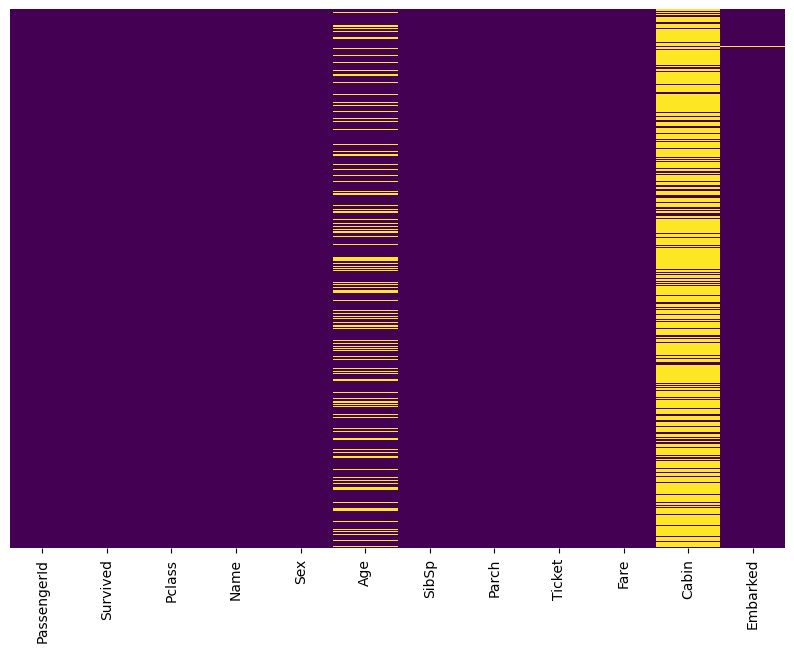

In [19]:
plt.figure(figsize = (10, 7))
sns.heatmap(
    train_v1.isnull(),
    yticklabels = False,
    cbar = False,
    cmap = 'viridis'
)

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/238898811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index,


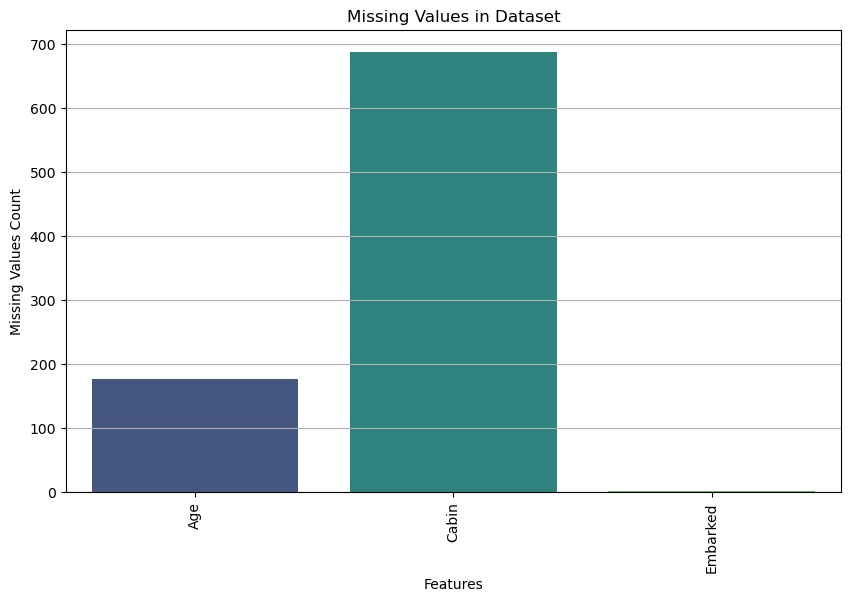

In [59]:
# Create a DataFrame with missing value counts
missing_data = pd.DataFrame(train_v1.isnull().sum(), columns=['Missing Values'])
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Keep only features with missing values

# Plot the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index,
            y=missing_data['Missing Values'],
            palette = 'viridis')

# Customize plot
plt.xticks(rotation=90)
plt.grid(axis = 'y')
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/1824498739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='Survived', ylabel='count'>

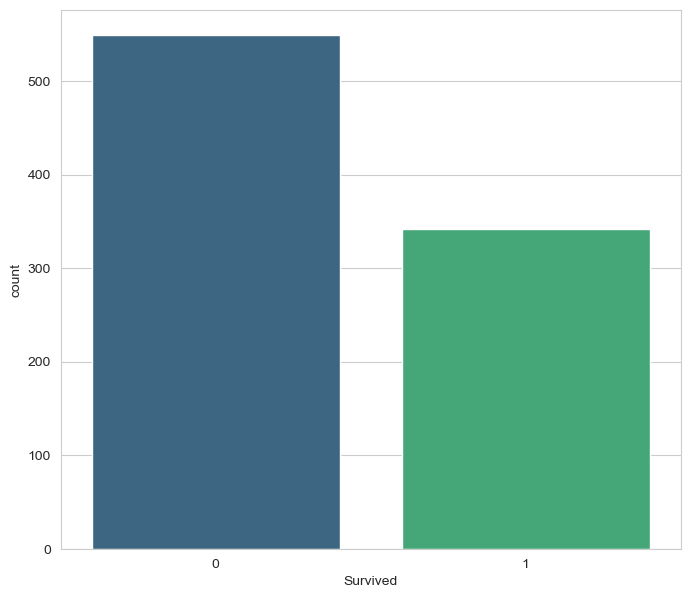

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'Survived',
    data = train_v1,
    palette = 'viridis'
)

<Axes: xlabel='Survived', ylabel='count'>

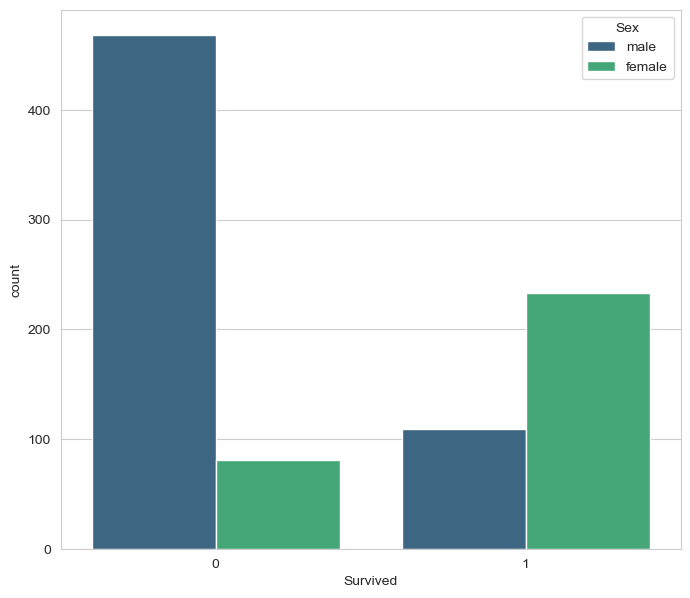

In [69]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'Survived',
    data = train_v1,
    hue = 'Sex',
    palette = 'viridis'
)

<Axes: xlabel='Survived', ylabel='count'>

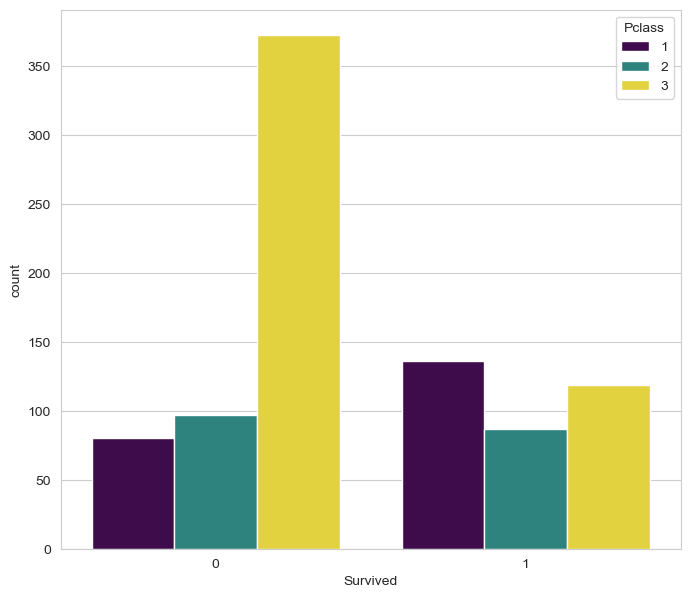

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'Survived',
    data = train_v1,
    hue = 'Pclass',
    palette = 'viridis'
)

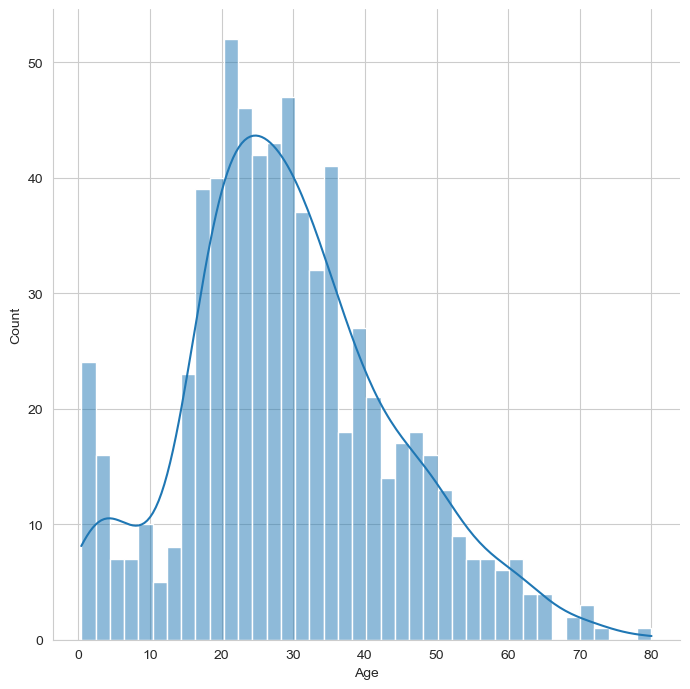

In [79]:
sns.displot(
    train_v1['Age'].dropna(), 
    kde = True,
    bins = 40,
    height = 7
)

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/3435998214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='SibSp', ylabel='count'>

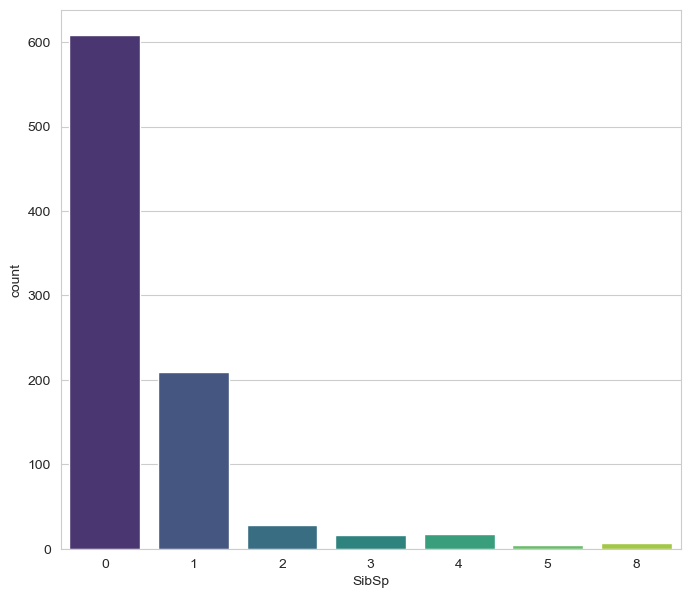

In [89]:
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'SibSp',
    data = train_v1,
    palette = 'viridis'
    
)

<Axes: ylabel='Frequency'>

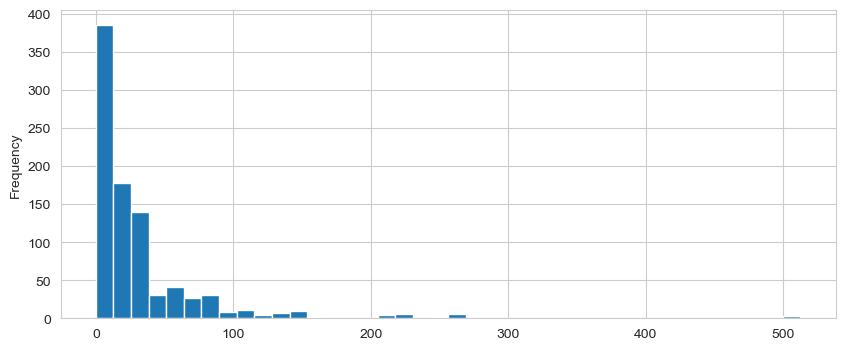

In [93]:
train_v1['Fare'].plot.hist(
    bins = 40,
    figsize = (10, 4)
)

# Data cleaning stage

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/2329452952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='Pclass', ylabel='Age'>

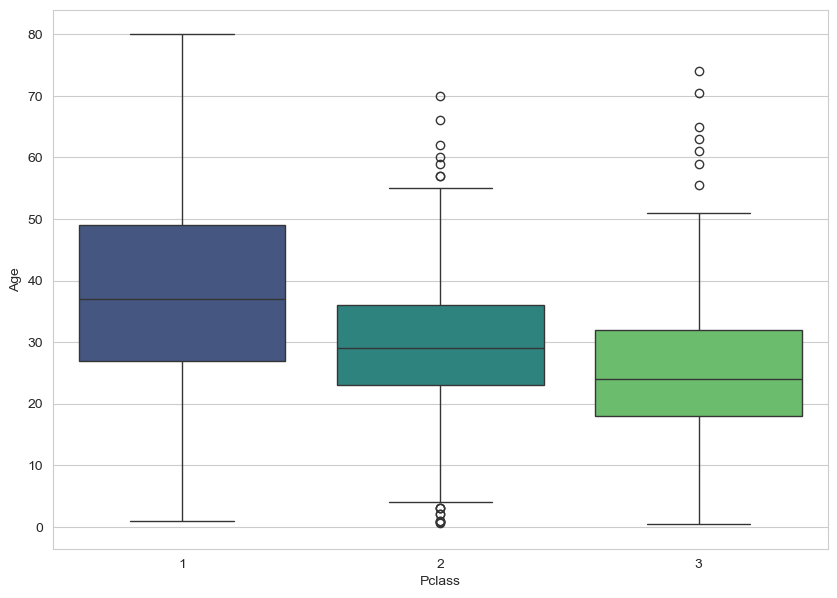

In [100]:
plt.figure(figsize = (10, 7))
sns.boxplot(
    x = 'Pclass',
    y = 'Age',
    data = train_v1,
    palette = 'viridis'
)

In [104]:
# imputation for null values

def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

train_v1['Age'] = train_v1[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

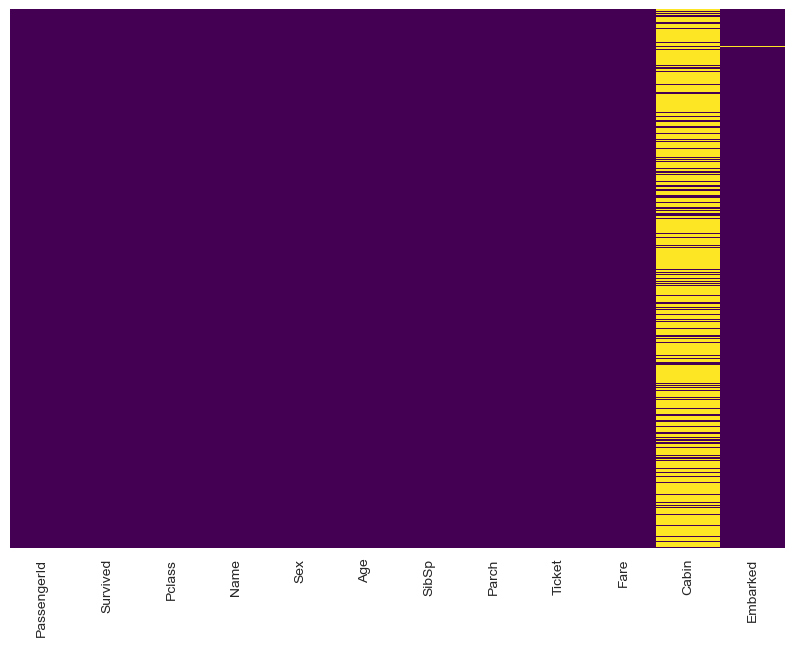

In [106]:
plt.figure(figsize = (10, 7))
sns.heatmap(
    train_v1.isnull(),
    yticklabels = False,
    cbar = False,
    cmap = 'viridis'
)

In [108]:
train_v1.drop(columns = ['Cabin'], axis = 1, inplace = True)

In [110]:
train_v1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [112]:
train_v1.dropna(inplace = True)

In [118]:
pd.DataFrame(train_v1.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [122]:
train_v1['Sex'].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [124]:
train_v1['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [126]:
# Label encoding for Sex feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(['male', 'female'])

train_v1['Sex'] = train_v1['Sex'].map({
    'male': 1,
    'female': 0
})

In [128]:
# Label encoding for Embarked feature

le.fit_transform(['S', 'C', 'Q'])

train_v1['Embarked'] = train_v1['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
})

In [130]:
train_v1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [134]:
# Drop unwanted feature 
train_v1.drop(columns = ['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)



KeyError: "['Name', 'Ticket'] not found in axis"

In [140]:
train_v1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [138]:
train_v1.drop(columns = ['PassengerId'], axis = 1, inplace = True)

# Build the model 

In [143]:
from sklearn.model_selection import train_test_split

X = train_v1.drop(columns = ['Survived'], axis = 1)
y = train_v1['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [149]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(
    X_train, y_train
)

LogisticRegression()

In [151]:
predictions = logmodel.predict(X_test)

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [155]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]])

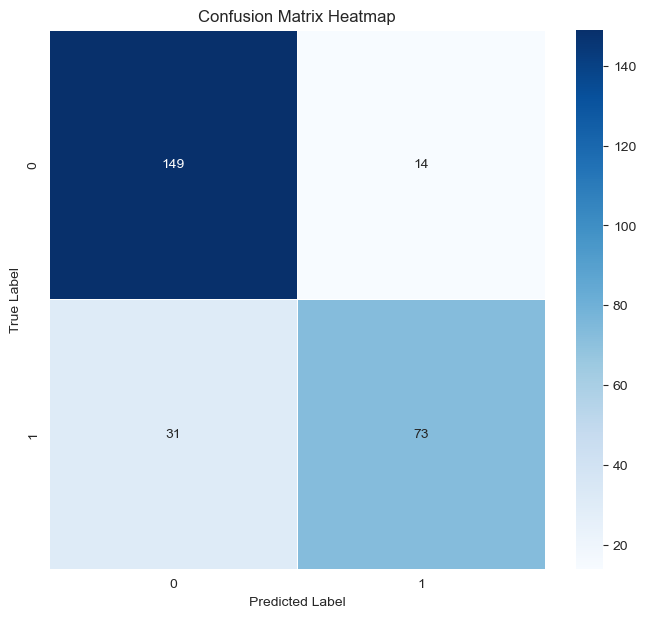

In [159]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Exercise project

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [164]:
data_02 = pd.read_csv(f'advertising.csv')
data_v2 = data_02.copy()

data_v2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [166]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [168]:
data_v2.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [170]:
data_v2.describe(include = ['object'])

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


Text(0.5, 1.0, 'distribution of Age')

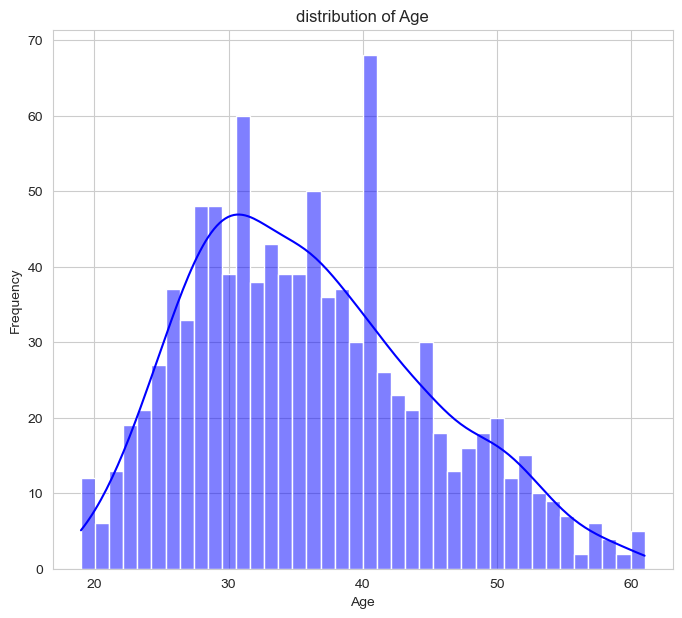

In [174]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.histplot(
    x = 'Age',
    data = data_v2,
    bins = 40,
    kde = True,
    color = 'blue'
)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('distribution of Age')

Text(40.347222222222214, 0.5, 'Area Income')

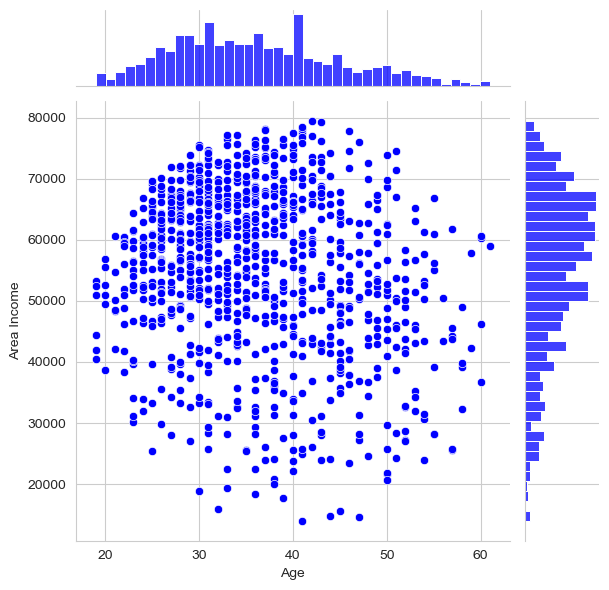

In [190]:
sns.jointplot(
    data = data_v2,
    x = 'Age', y = 'Area Income',
    kind = 'scatter',
    height = 6,
    marginal_kws = dict(bins = 40, fill = True),
    color = 'blue'
)

plt.title('Age vs Area Income', y = 1.02)
plt.xlabel('Age')
plt.ylabel('Area Income')


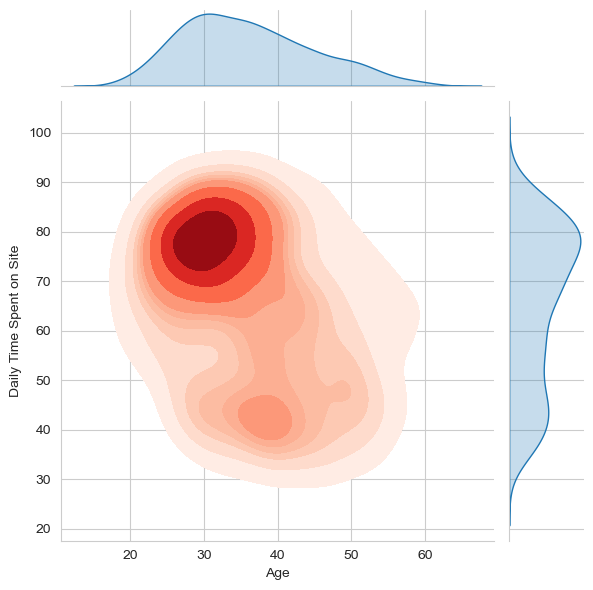

In [198]:
sns.jointplot(
    data = data_v2,
    x = 'Age',
    y = 'Daily Time Spent on Site',
    kind = 'kde',
    fill = True,
    cmap = 'Reds',
    height = 6
)

Text(40.347222222222214, 0.5, 'Daily Internet Usage')

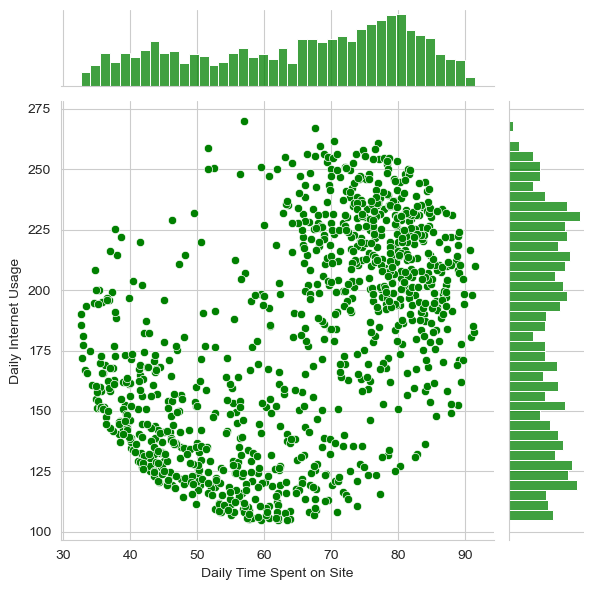

In [200]:
sns.jointplot(
    data = data_v2,
    x = 'Daily Time Spent on Site', y = 'Daily Internet Usage',
    kind = 'scatter',
    height = 6,
    marginal_kws = dict(bins = 40, fill = True),
    color = 'green'
)

plt.title('Daily Time Spent on Site vs Daily Internet Usage', y = 1.02)
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')

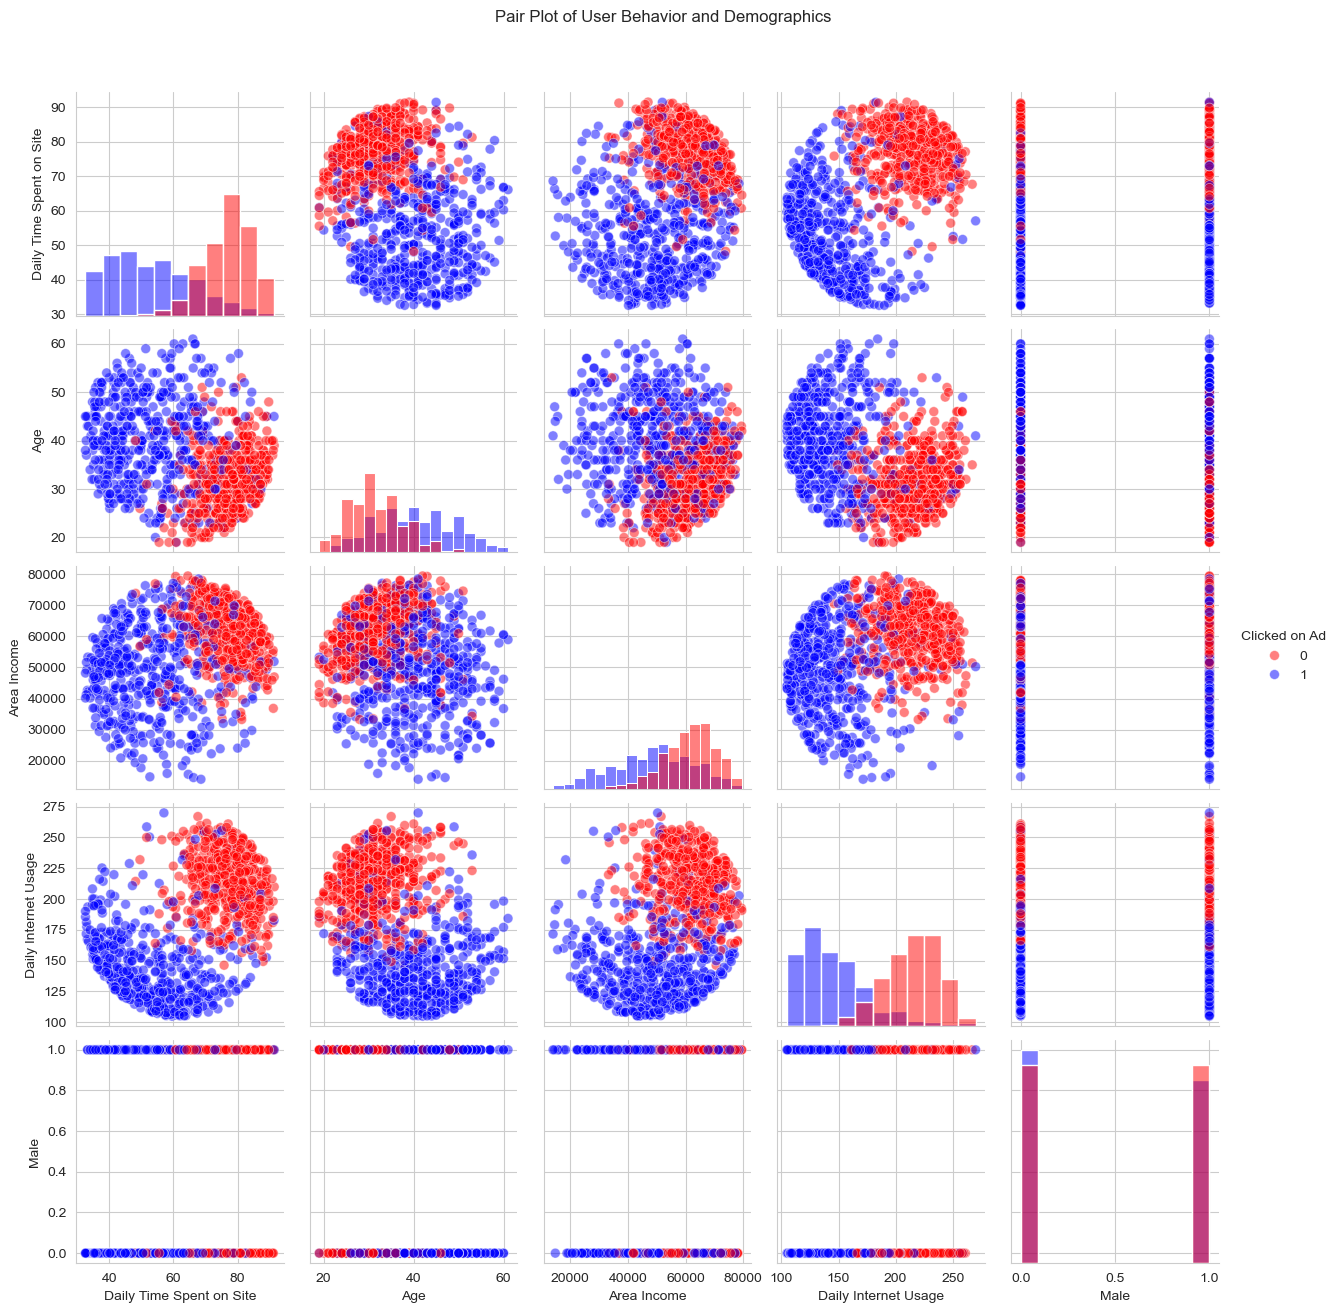

In [208]:
sns.set_style("whitegrid")

# Create the pair plot
g = sns.pairplot(
    data=data_v2,
    hue='Clicked on Ad',  # Color points by this categorical variable
    palette=['red', 'blue'],  # Colors for the hue categories (0=red, 1=blue)
    diag_kind='hist',  # Use histograms on the diagonal
    plot_kws={'alpha': 0.5, 's': 50},  # Scatter plot kwargs: transparency and size
    height=2.5  # Size of each subplot
)

# Customize the plot (optional)
g.fig.suptitle('Pair Plot of User Behavior and Demographics', y=1.05)

# Display the plot
plt.show()

# Model building 

In [211]:
data_v2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [213]:
data_v2.drop(columns = ['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis = 1, inplace = True)

In [215]:
data_v2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [219]:
X = data_v2.drop(columns = ['Clicked on Ad'], axis = 1)
y = data_v2['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [227]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logmodel2 = LogisticRegression(max_iter = 1000, solver = 'liblinear')

logmodel2.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [229]:
predictions2 = logmodel2.predict(X_test_scaled)

In [233]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



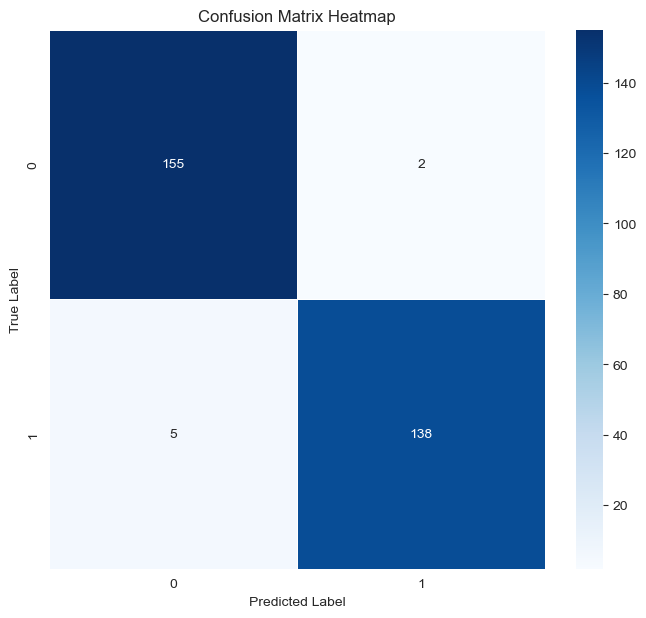

In [235]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions2)

# Plot heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()